1) **Delivery_time** -> **Predict** **delivery time using sorting time**
2) **Salary_hike ->** **Build a prediction model for Salary_hike**

------------------------------------------------------------

**Build a simple linear regression model by performing EDA:** 

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [86]:
dataset = pd.read_csv("/content/delivery_time.csv")  #Delivery Time Data Set
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [88]:
dataset.corr()            #Corelation Analysis

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


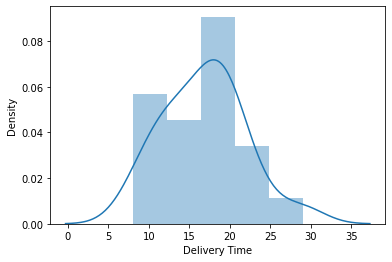

In [89]:
sns.distplot(dataset['Delivery Time'])  #EDA Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


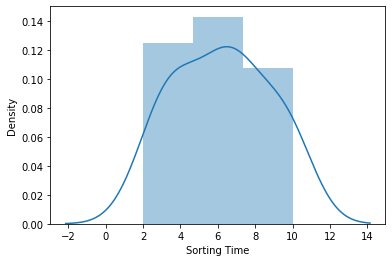

In [90]:
sns.distplot(dataset['Sorting Time'])

**Fitting a Linear Regression Model**[link text](https://)

In [91]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Model Creation**

In [92]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit() #Model Created

***Model Testing**

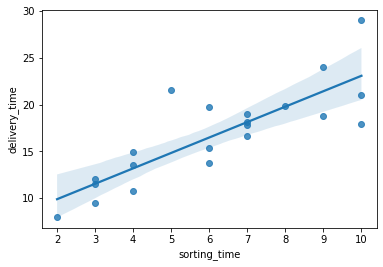

In [93]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [94]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [95]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [96]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

**`Predict For New Data Point`**

In [97]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time


14.827834

In [98]:
# Automatic Prediction for say sorting time 7, 10
new_data=pd.Series([7,10])
new_data

0     7
1    10
dtype: int64

In [99]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,10


In [100]:
model.predict(data_pred)

0    18.125873
1    23.072933
dtype: float64

**Salary_hike -> Build a prediction model for Salary_hike**

In [101]:
data = pd.read_csv("/content/Salary_Data.csv")  #Salary Data Set
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**EDA and Data Visualization**


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [103]:
data.corr()            #Corelation Analysis

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


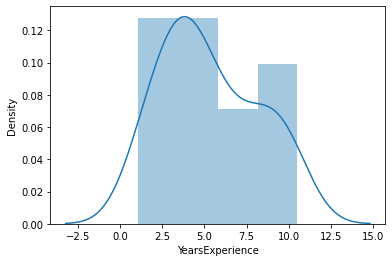

In [104]:
sns.distplot(data['YearsExperience'])  #EDA Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


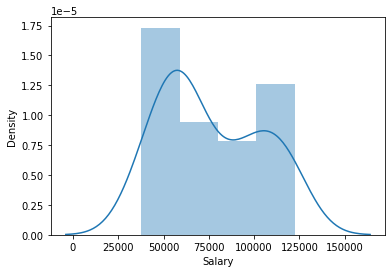

In [105]:
sns.distplot(data['Salary'])

**Model Building**


In [106]:
model2=smf.ols("Salary~YearsExperience",data=data).fit()

**Model Testing**

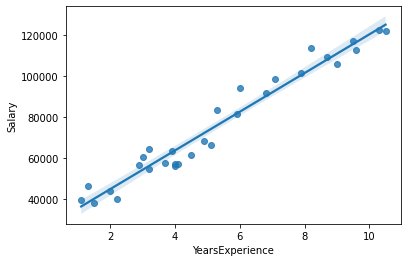

In [107]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [108]:
#Coefficients
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [109]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [110]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

**`Predict For New Data Point`**

In [111]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [112]:
# Automatic Prediction for say 3 & 5 Years Experience 

New_data=pd.Series([3,5])
New_data

0    3
1    5
dtype: int64

In [115]:
data_pred=pd.DataFrame(New_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [116]:
model2.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64